In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical, plot_model, model_to_dot, print_summary
from keras.preprocessing.image import ImageDataGenerator

from IPython.display import SVG

import matplotlib.pyplot as plt

from google.colab import files

Using TensorFlow backend.


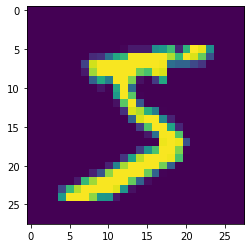

In [2]:
batch_size = 86
num_classes = 10
epochs = 30
# Images dimensions
img_rows, img_cols = 28, 28

# Loading the data and split in training and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Showing the first image
plt.imshow(X_train[0])

In [0]:
# Reshaping the data to fit the model

if K.image_data_format() == 'channel_firs':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [4]:
# Normalizing the data to train faster

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#print(f'x_train shape: {X_train.shape}')
#print(f'{X_train.shape[0]} train samples')
#print(f'{X_test.shape[0]} test samples')

# Converting class vectors to binary class. One-hot encode target column
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
# Building the model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (img_rows, img_cols,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [7]:
# Compiling the model

# Modifying the optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = optimizer, metrics = ['accuracy'])

#model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [8]:
# Training the model
#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, Y_test))
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size), epochs = epochs, verbose = 1, validation_data = (X_test, Y_test), callbacks = [learning_rate_reduction])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30





698/698 [==============================] - 28s 40ms/step - loss: 0.3144 - acc: 0.9012 - val_loss: 0.0331 - val_acc: 0.9884
Epoch 2/30
698/698 [==============================] - 26s 38ms/step - loss: 0.1001 - acc: 0.9695 - val_loss: 0.0234 - val_acc: 0.9918
Epoch 3/30
698/698 [==============================] - 26s 37ms/step - loss: 0.0803 - acc: 0.9770 - val_loss: 0.0171 - val_acc: 0.9942
Epoch 4/30
698/698 [==============================] - 26s 38ms/step - loss: 0.0692 - acc: 0.9802 - val_loss: 0.0181 - val_acc: 0.9948
Epoch 5/30
698/698 [==============================] - 26s 37ms/step - loss: 0.0629 - acc: 0.9819 - val_loss: 0.0176 - val_acc: 0.9938
Epoch 6/30
698/698 [==============================] - 26s 37ms/step - loss: 0.0605 - acc: 0.9825 - val_loss: 0.0231 - val_acc: 0.9928
Epoch 7/30
698/698 [==============================] - 26s 37ms/step - loss: 0.0613 - acc: 0.98

In [9]:
# Evaluating the model
score = model.evaluate(X_test, Y_test, verbose = 0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.013310892335214885
Test accuracy: 0.9961


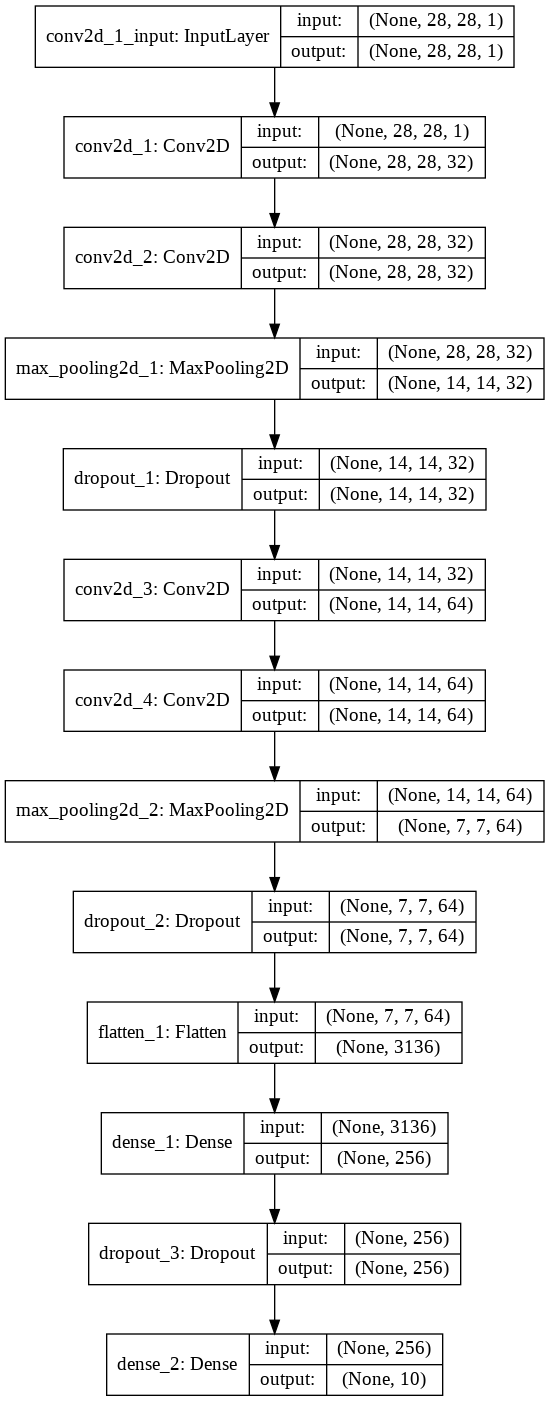

In [10]:
# Plot the model
pltmodel = plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')
pltmodel

In [0]:
#open('arquitectura_cnn.png', 'wb').write(pltmodel.data)
#files.download("arquitectura_cnn.png")

In [12]:
# Summary of the model
print_summary(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

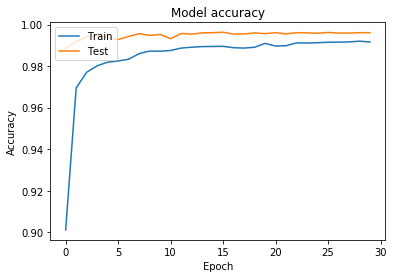

<Figure size 1440x1280 with 0 Axes>

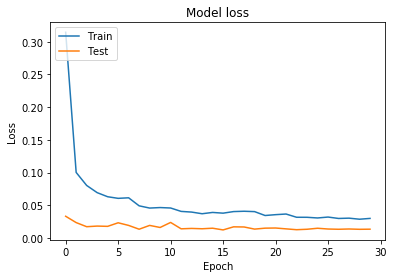

<Figure size 1440x1280 with 0 Axes>

In [13]:
# Plot training and validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
plt.show()

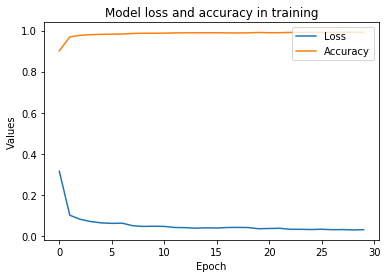

<Figure size 1440x1280 with 0 Axes>

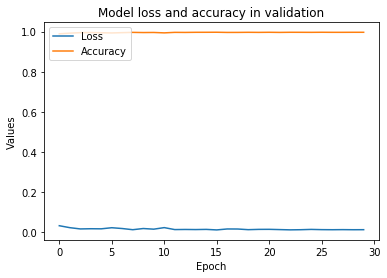

<Figure size 1440x1280 with 0 Axes>

In [14]:
# Plot training loss and accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('Model loss and accuracy in training')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc = 'upper right')
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.title('Model loss and accuracy in validation')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc = 'upper left')
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
plt.show()